<a href="https://colab.research.google.com/github/KOdunga/MITIDSS/blob/main/AudioMNISTDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Audio MNIST Digit Recognition

**Objective**
- To build an ANN that can look at Mel of MFCC spectorgrams of audio files and classify them into 10 classes. These audi files are different speakers uttering a particular digit and the corresponding class to be predicted is the digit itself.

**Supporting Packages**

- Install Librosa. This is a python package that helps in handling audio files. 
- tdqm is a python package that allows us to add a progress bar to our application. This package will help us in iteratinf over the audio package.

In [50]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
#Import necessary libraries and load the data
import librosa
import librosa.display as dsp
from IPython.display import Audio

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import zipfile
import os

In [52]:
sns.set_style('dark')

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
path = '/content/drive/MyDrive/DSML/Audio_MNIST_Archive.zip'
#Extract files from the zip file
with zipfile.ZipFile(path,'r') as zip_ref:
  zip_ref.extractall()

- We will load the  .wav file which stores the audio format using the librosa package
- The function get_audio() takes a digit as an argument and plots the audio wave and returns the audio for a given digit.

In [55]:
def get_audio(digit =0):
  #Audio sample directory
  sample = np.random.randint(1,10)

  #Index of audio
  index = np.random.randint(1,5)

  #modified file location
  if sample < 10:
    file = f'/content/data/0{sample}/{digit}_0{sample}_{index}.wav'
  else:
    file = f'/content/data/{sample}/{digit}_{sample}_{index}.wav'

  #Get audio from the location. Audio will automatically be resampled to the given rate (default sr = 22050)
  data, sample_rate = librosa.load(file)

  #Plot the audio wave
  dsp.waveshow(data, sr = sample_rate)
  plt.show()

  #Show the widget
  return Audio(data = data, rate = sample_rate)

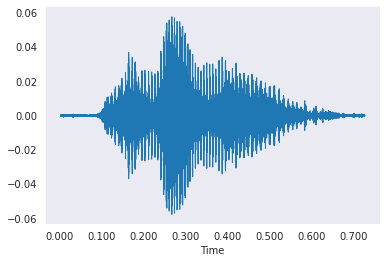

In [56]:
#show the audio and plot of digit 0 
get_audio(0)

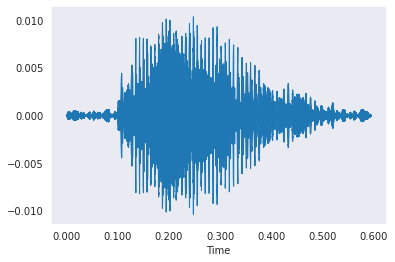

In [57]:
#show the audio and plot of digit 1 
get_audio(1)

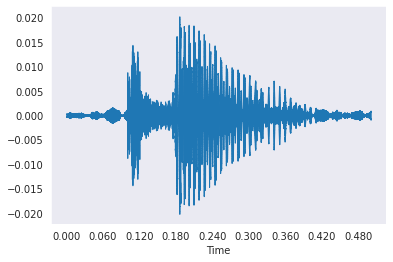

In [58]:
#show the audio and plot of digit 2 
get_audio(2)

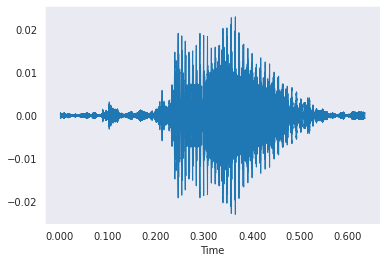

In [59]:
#show the audio and plot of digit 3 
get_audio(3)

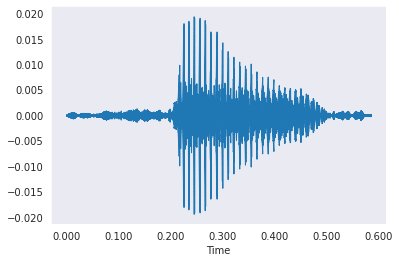

In [60]:
#show the audio and plot of digit 4 
get_audio(4)

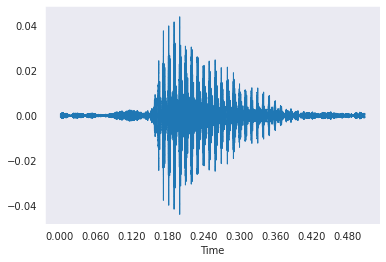

In [61]:
#show the audio and plot of digit 5 
get_audio(5)

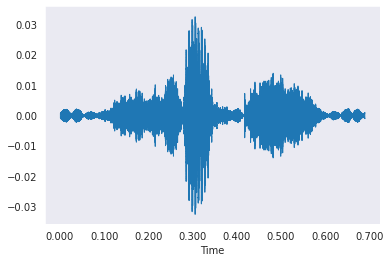

In [62]:
#show the audio and plot of digit 6 
get_audio(6)

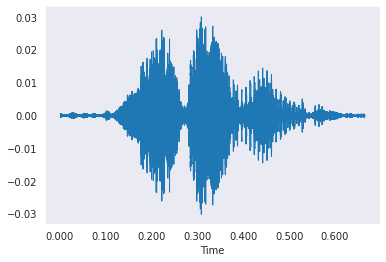

In [63]:
#show the audio and plot of digit 7 
get_audio(7)

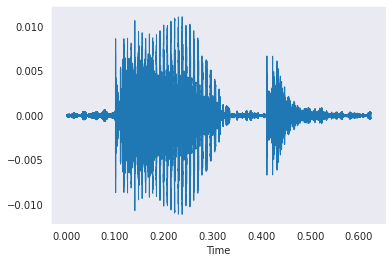

In [64]:
#show the audio and plot of digit 8 
get_audio(8)

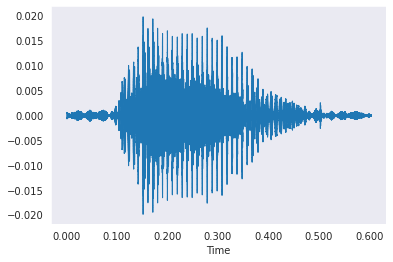

In [65]:
#show the audio and plot of digit 9 
get_audio(9)

**Visualizing the spectrogram of the audio data**

- A spectrogram is a visual way of representing the signal strength or 'loudness' of a signalover time at various frequencies or timesteps present in a particular waveform. It represents the frequency, amplitude and time of an audio clip in a single plot.
- Since spectrograms are continous plots, they can be represented as an image.
- A vocoder is used in R&D to convert spectrograms back to audio using ML techniques. One example of a vocoder is Wavenet which is used in almost all Text to Speech architectures.

In [66]:
#A function that returns the audio file for a mentioned gift
def get_audio_raw(digit =0):
  #Audio sample directory
  sample = np.random.randint(1,10)

  #Index of audio
  index = np.random.randint(1,5)

  #modified file location
  if sample < 10:
    file = f'/content/data/0{sample}/{digit}_0{sample}_{index}.wav'
  else:
    file = f'/content/data/{sample}/{digit}_{sample}_{index}.wav'

  #Get audio from the location. Audio will automatically be resampled to the given rate (default sr = 22050)
  data, sample_rate = librosa.load(file)

  #Show the widget
  return Audio(data = data, rate = sample_rate)

Extracting features from Audio file

In [67]:
# Will take an audio file as input and return extracted features using MEL_FREQUENCY CEPSTRAL COEFFICIENT as the output
def extract_features(file):

    # Load audio and its sample rate
    audio, sample_rate = librosa.load(file)

    # Extract features using mel-frequency coefficient
    extracted_features = librosa.feature.mfcc(y = audio,
                                              sr = sample_rate,
                                              n_mfcc = 40)
    
    # Scale the extracted features
    extracted_features = np.mean(extracted_features.T, axis = 0)

    # Return the extracted features
    return extracted_features


def preprocess_and_create_dataset():

    # Path of the folder where the audio files are present
    root_folder_path = "/content/data/"

    # Empty List to create dataset
    dataset = []
    
    # Iterating through folders where each folder has the audio of each digit
    for folder in tqdm(range(1, 11)):

        if folder < 10:

            # Path of the folder
            folder = os.path.join(root_folder_path, "0" + str(folder))

        else:
            folder = os.path.join(root_folder_path, str(folder))
            
        # Iterate through each file of the present folder
        for file in tqdm(os.listdir(folder)):

            # Path of the file
            abs_file_path = os.path.join(folder, file)

            # Pass path of file to the extracted_features() function to create features
            extracted_features = extract_features(abs_file_path) 

            # Class of the audio, i.e., the digit it represents
            class_label = file[0]
            
            # Append a list where the feature represents a column and class of the digit represents another column
            dataset.append([extracted_features, class_label])
    
    # After iterating through all the folders, convert the list to a DataFrame
    return pd.DataFrame(dataset, columns = ['features', 'class'])

In [68]:
# Create the dataset by calling the function
dataset = preprocess_and_create_dataset()

100%|██████████| 10/10 [08:00<00:00, 48.02s/it]


**Now let us create the dataset using the defined function**

In [69]:
#View the head of the data frame
dataset.head()

,features,class
0,"[-638.7345, 109.38671, 11.624736, 31.043934, 1...",0
1,"[-673.6548, 109.99009, 24.226599, 37.298985, 2...",2
2,"[-676.8042, 146.20091, 27.80585, 27.163311, 19...",1
3,"[-612.95624, 83.44628, -4.629451, 49.37439, 33...",3
4,"[-614.36707, 24.374807, 25.134394, 36.68316, 1...",6


In [70]:
#Store the class as int
dataset['class'] = [int(x) for x in dataset['class']]

In [71]:
#Check the frequency of classes in the dataset
dataset['class'].value_counts()

0    500
2    500
1    500
3    500
6    500
4    500
9    500
8    500
5    500
7    500
Name: class, dtype: int64

**Visualizing the mel frequency cepstral coefficients using a spectrogram**

In [72]:
#A function which returns MFCC
def draw_spectrograms(audio_data, sample_rate):
  #Extract features
  extracted_features = librosa.feature.mfcc(y = audio_data,
                                            sr = sample_rate,
                                            n_mfcc=40)
  #Return features without scaling
  return extract_features

TypeError: ignored

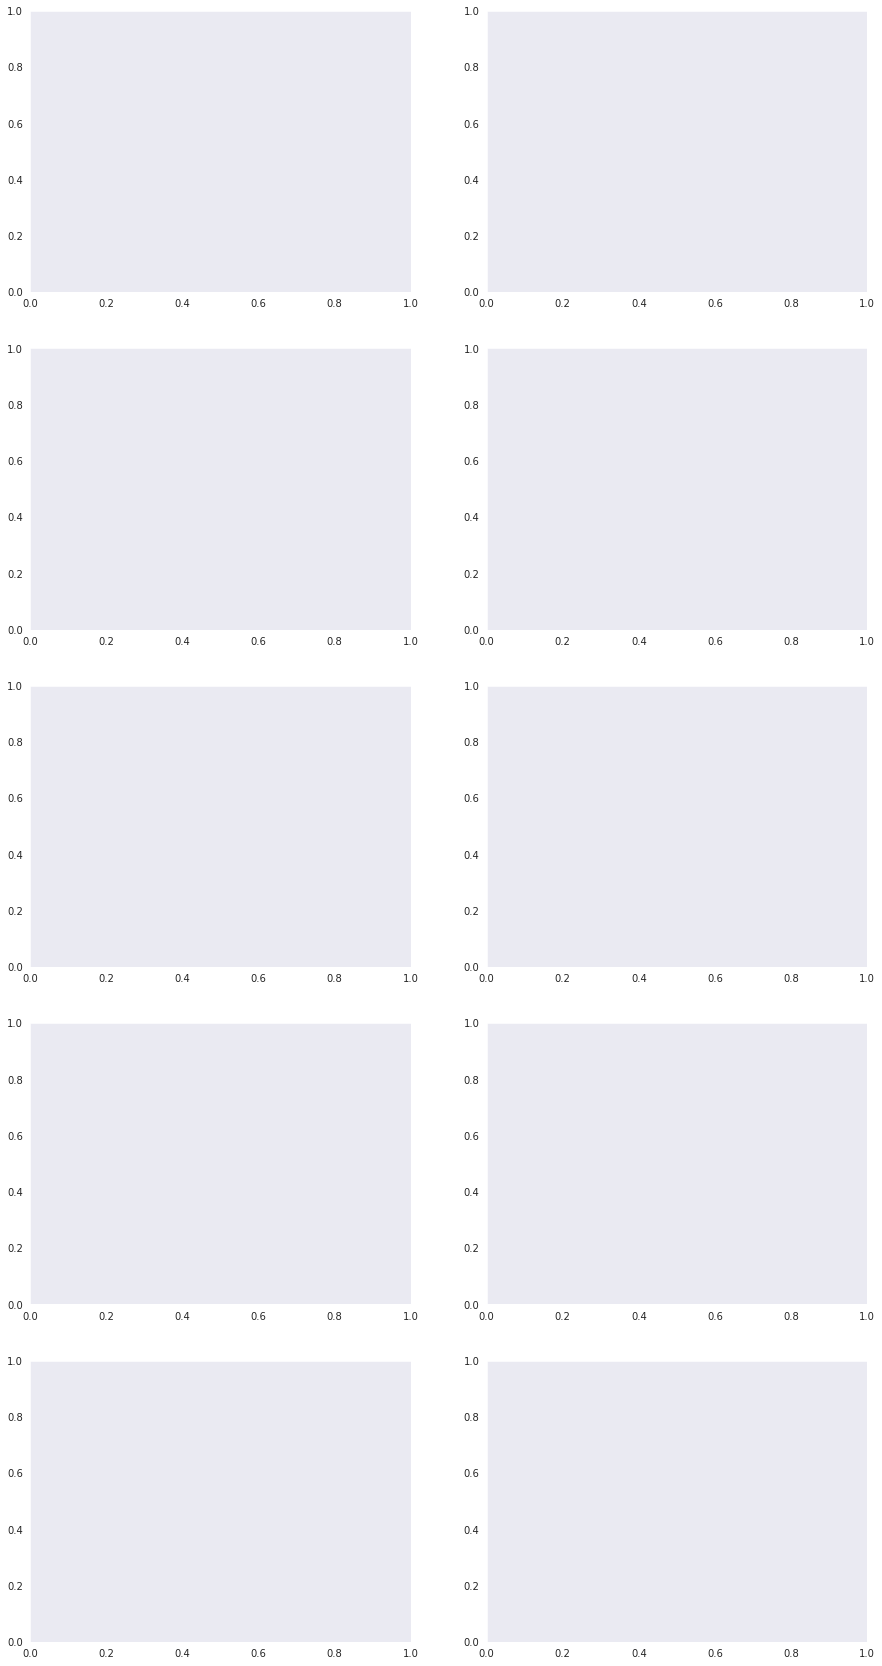

In [75]:
# Creating subplots
fig, ax = plt.subplots(5, 2, figsize = (15, 30))

# Initializing row and column variables for subplots
row = 0
column = 0

for digit in range(10):

    # Get the audio of different classes (0-9)
    audio_data, sample_rate = get_audio_raw(digit)
    
    # Extract their MFCC
    mfcc = draw_spectrograms(audio_data, sample_rate)
    print(f"Shape of MFCC of audio digit {digit} ---> ", mfcc.shape)
    
    # Display the plots and its title
    ax[row,column].set_title(f"MFCC of audio class {digit} across time")
    librosa.display.specshow(mfcc, sr = 22050, ax = ax[row, column])
    
    # Set X-labels and Y-labels
    ax[row,column].set_xlabel("Time")
    ax[row,column].set_ylabel("MFCC Coefficients")
    
    # Conditions for positioning of the plots
    if column == 1:
        column = 0
        row += 1
    else:
        column+=1
        
    
plt.tight_layout(pad = 3)   
plt.show()

**Perform Train- Test Split**

In [76]:
from sklearn.model_selection import train_test_split
X = np.array(dataset['features'].to_list())
Y = np.array(dataset['class'].to_list())

#Create train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, shuffle = True, random_state = 8)

In [77]:
X_train.shape

(3750, 40)

## Modelling

- Create an ANN to recognize the digit
- We will use Keras and sklearn libraries

In [78]:
#To create ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#To create a checkpoint and save the best model

from tensorflow.keras.callbacks import ModelCheckpoint

#To load the model
from tensorflow.keras.models import load_model

#To evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

### Model Creation

In [79]:
model = Sequential() # create a sequential object
model.add(Dense(100, input_shape = (40,), activation ='relu')) # add the first layer with 100 neurons
model.add(Dense(100, activation ='relu'))# add the second layer with 100 neurons 
model.add(Dense(100, activation ='relu'))# add the third layer with 100 neurons 
model.add(Dense(10, activation ='softmax'))# output layer with 10 neurons as we need 10 classes

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 25,310
Trainable params: 25,310
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [82]:
num_epochs = 100
batch_size = 32
model.fit(X_train, Y_train, validation_data = (X_test,Y_test),epochs = num_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/100
118/118 [==============================] - 2s 5ms/step - loss: 2.6004 - accuracy: 0.5312 - val_loss: 0.6411 - val_accuracy: 0.7800
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4594 - accuracy: 0.8275 - val_loss: 0.4101 - val_accuracy: 0.8352
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.8997 - val_loss: 0.3859 - val_accuracy: 0.8712
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.9235 - val_loss: 0.1625 - val_accuracy: 0.9544
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9541 - val_loss: 0.2792 - val_accuracy: 0.9120
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.1405 - accuracy: 0.9515 - val_loss: 0.1131 - val_accuracy: 0.9704
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 0.1062 - accuracy: 0.9632 - val_loss: 0.1290 - val_accuracy: 0.9512

**Model Evaluation**

In [83]:
Y_pred = model.predict(X_test)
Y_pred = [np.argmax(i) for i in Y_pred]

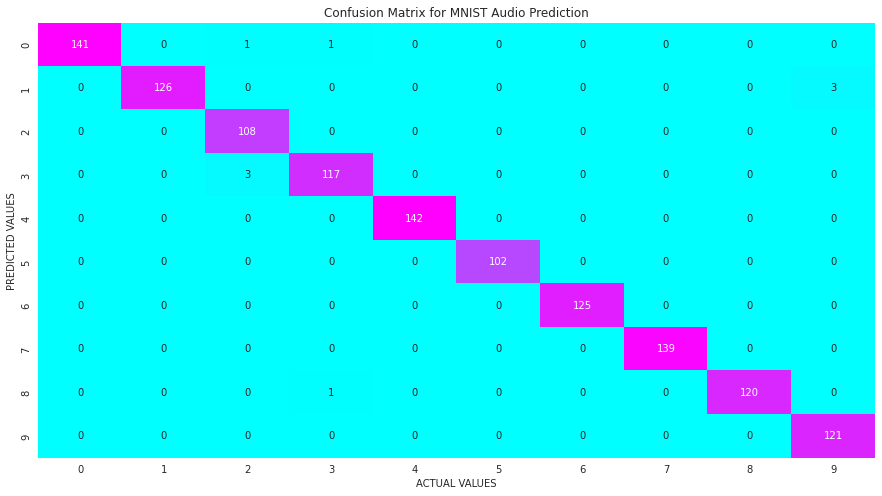

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       143
           1       1.00      0.98      0.99       129
           2       0.96      1.00      0.98       108
           3       0.98      0.97      0.98       120
           4       1.00      1.00      1.00       142
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00       125
           7       1.00      1.00      1.00       139
           8       1.00      0.99      1.00       121
           9       0.98      1.00      0.99       121

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [85]:
sns.set_style('dark')
plt.figure(figsize = (15,8))
plt.title('Confusion Matrix for MNIST Audio Prediction')
cm = confusion_matrix([int(x) for x in Y_test], Y_pred)
#plot the confusion matrix as a heatmap
sns.heatmap(cm, annot = True, cmap = 'cool', fmt ='g', cbar = False)
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.show()
print(classification_report(Y_test, Y_pred))


**Observations**
- From the CM, it shows that most of the observations are correctly identified by the model
- In very few cases, the model is not able to identify the correct digit. 
- The model has given a great performance with 99% recall, precision and F1 score.